# ***Clustering con DBSCAN***

In [1]:
%load_ext kedro.ipython 

[11/26/25 20:55:19] INFO     Using                                                                  ]8;id=375916;file:///usr/local/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=321800;file:///usr/local/lib/python3.11/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/usr/local/lib/python3.11/site-packages/kedro/framework/project/rich_                
                             logging.yml' as logging configuration.                                                

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=852168;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=824194;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=91715;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=349113;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as: /app.                                        ]8;id=480318;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=277446;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/26/25 20:55:27] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=687549;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=48008;file:///usr/local/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/26/25 20:55:28] INFO     Kedro project machine_learning_project                                 ]8;id=825993;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=65615;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=597693;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=416468;file:///usr/local/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    WARNING  Failed to load kedro_viz.launchers.jupyter commands from                  ]8;id=891508;file:///usr/local/lib/python3.11/site-packages/kedro/framework/cli/utils.py\utils.py]8;;\:]8;id=787637;file:///usr/local/lib/python3.11/site-packages/kedro/framework/cli/utils.py#346\346]8;;\
                             EntryPoint(name='line_magic',                                                         
                             value='kedro_viz.launchers.jupyter:run_viz', group='kedro.line_magic').               
                             Full exception: email-validator version >= 2.0 required, run pip install              
                             -U email-validator                                                                    

In [2]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'model_input_table',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regre

In [3]:
df_FIFA = catalog.load("model_input_table")
df_fifa_22 = catalog.load("preprocess_fifa_22")

[11/26/25 20:55:29] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=508601;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=136528;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=756304;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=983782;file:///usr/local/lib/python3.11/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

#### **Importaciónes**

In [4]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

# -- Procesado y modelado --
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

#### **Selección de features**

In [5]:
features = [
    "Age",
    "Overall",
    "Potential",
    "BallControl",
    "Dribbling",
    "Finishing",
    "ShortPassing",
    "Acceleration",
    "SprintSpeed",
    "Agility",
    "Stamina",
    "Strength",
]

X = df_fifa_22[features]

#### **Escalado Estandarización**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### **Búsqueda del parámetro EPS (k-distance plot)**

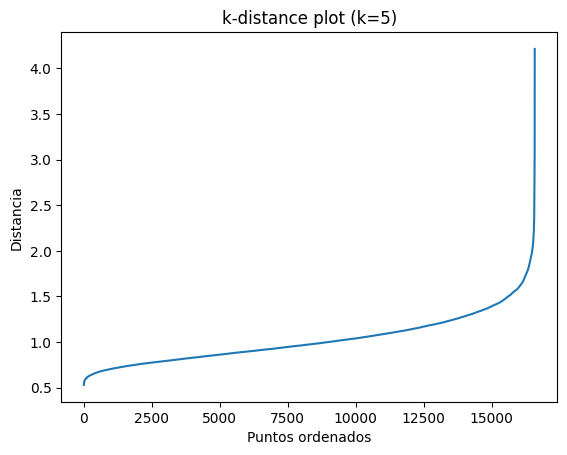

In [7]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("k-distance plot (k=5)")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia")
plt.show()


Interpretar el “codo” → sugerencia de eps.

R: 

#### **Entrenar DBSCAN** (desde aqui error)

In [8]:
from sklearn.cluster import DBSCAN

# Dataset limpio y escalado
X = df_fifa_22[features]  
X_scaled = scaler.fit_transform(X)

# Modelo
dbscan = DBSCAN(eps=0.7, min_samples=5)

# Etiquetas
labels = dbscan.fit_predict(X_scaled)

# Agregar al dataframe
df_fifa_22["DBSCAN_cluster"] = labels
df_fifa_22.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Overall_Class_Bin,Joined_Year,Joined_Month,Joined_Day,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,DBSCAN_cluster
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,...,1,0,0,0,179,69.0,107500000.0,250000.0,206900000.0,-1
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,...,1,0,0,0,189,82.0,93000000.0,140000.0,160400000.0,-1
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,...,1,0,0,0,182,83.0,44500000.0,135000.0,91200000.0,-1
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,...,1,0,0,0,172,69.0,37000000.0,45000.0,77700000.0,-1
5,212622,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,...,1,0,0,0,177,75.0,108000000.0,160000.0,186300000.0,-1


#### **Visualización**

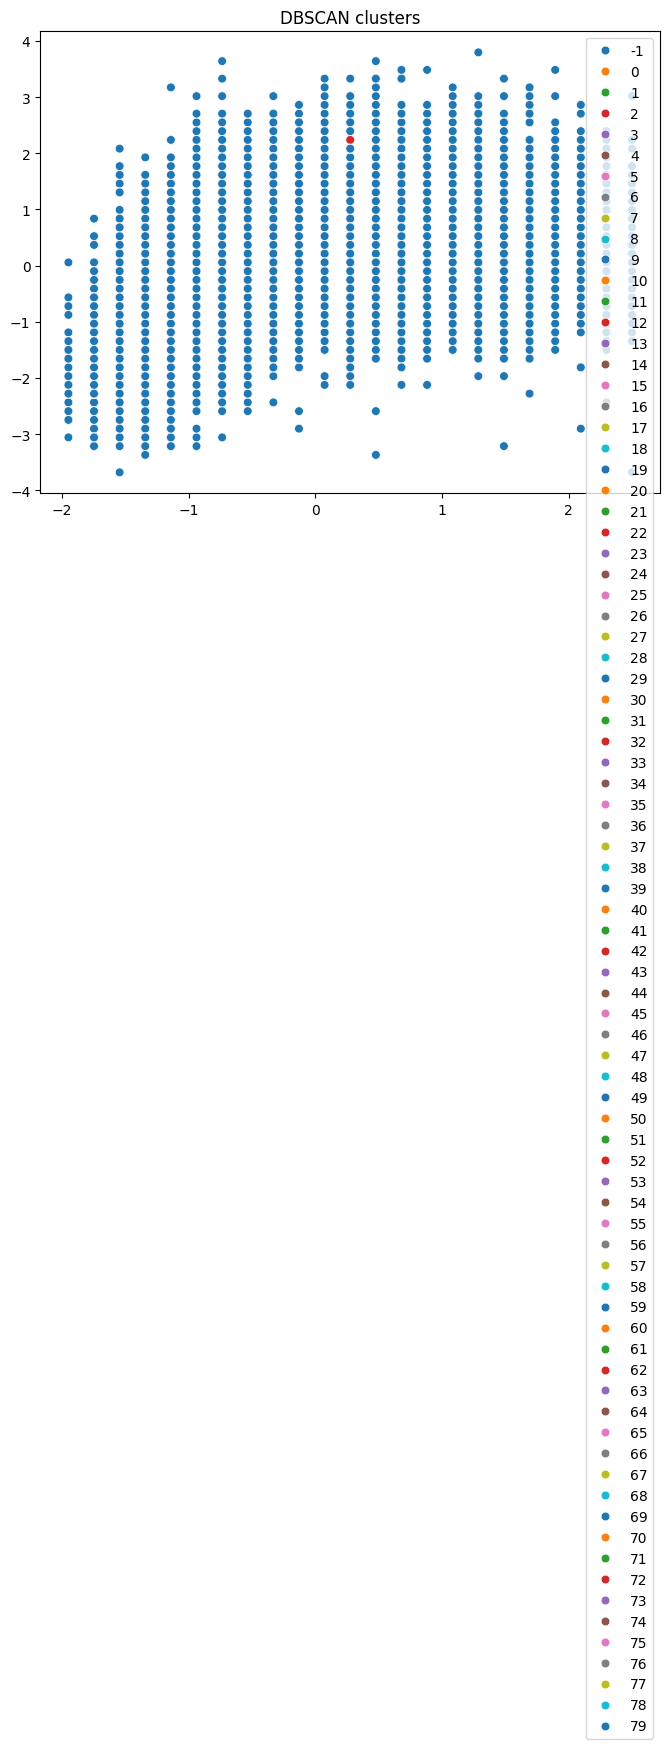

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="tab10", s=40)
plt.title("DBSCAN clusters")
plt.show()


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df_fifa_22["KMeans_cluster"] = kmeans_labels


#### **Comparación con KMeans**

In [13]:
df_fifa_22[["KMeans_cluster", "DBSCAN_cluster"]].head()

,KMeans_cluster,DBSCAN_cluster
0,2,-1
1,2,-1
2,2,-1
4,2,-1
5,2,-1


#### **Gráfico combinado o tabla de conteo**

In [15]:
pd.crosstab(df_fifa_22["KMeans_cluster"], df_fifa_22["DBSCAN_cluster"])

DBSCAN_cluster,-1,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
KMeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,4628,0,558,0,0,0,0,0,0,0,...,3,4,5,5,5,4,7,3,9,0
1,1611,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,4342,11,1071,5,4,5,14,7,4,4,...,0,0,0,0,0,0,0,0,0,0
3,3808,0,102,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,2,0,0


#### **Conclusion**

No usamos todas las métricas en todos los modelos porque cada técnica de clustering asume una estructura distinta.
KMeans funciona con clusters esféricos → métricas como silhouette y CH funcionan bien.
DBSCAN genera clusters de densidad y ruido → esas métricas dejan de ser válidas, así que lo evaluamos por densidad, visualización y comparación.
La selección de métricas depende del algoritmo.